In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

%matplotlib inline 

In [70]:
df = pd.read_csv('Breast_Cancer.csv')
print(df.shape)
df.head()

(4024, 16)


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [71]:
#Checking for empty Cell
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [72]:
#Checking for duplicates
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
436,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive


Alive    3408
Dead      616
Name: Status, dtype: int64

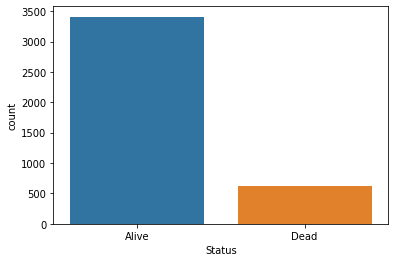

In [73]:
sns.countplot(x = 'Status', data = df)
df['Status'].value_counts()

In [74]:
df['T Stage '].value_counts()

T2    1786
T1    1603
T3     533
T4     102
Name: T Stage , dtype: int64

In [75]:
df['N Stage'].value_counts()

N1    2732
N2     820
N3     472
Name: N Stage, dtype: int64

<AxesSubplot:ylabel='A Stage'>

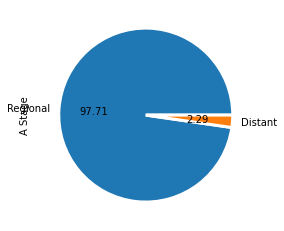

In [76]:
df["A Stage"].value_counts().plot(kind="pie",autopct='%.2f', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

In [77]:
df2 = df[df["A Stage"].str.contains('Distant')]
df2.head(5)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
9,69,White,Married,T4,N3,IIIC,Well differentiated,1,Distant,32,Positive,Positive,21,12,92,Alive
138,61,White,Single,T2,N3,IIIC,Moderately differentiated,2,Distant,49,Positive,Positive,14,10,53,Dead
167,37,White,Single,T4,N3,IIIC,Moderately differentiated,2,Distant,70,Positive,Positive,24,17,102,Alive
194,42,White,Single,T3,N3,IIIC,Moderately differentiated,2,Distant,75,Positive,Positive,16,13,55,Alive
219,50,White,Married,T3,N3,IIIC,Poorly differentiated,3,Distant,75,Negative,Negative,27,27,23,Dead


In [78]:
#Checking if 6th Stage and A Stage corresponds to one another
df2.iloc[:,5:9:3].head(25)

,6th Stage,A Stage
9,IIIC,Distant
138,IIIC,Distant
167,IIIC,Distant
194,IIIC,Distant
219,IIIC,Distant
236,IIIC,Distant
238,IIIC,Distant
243,IIIC,Distant
270,IIIC,Distant
294,IIIC,Distant


<AxesSubplot:ylabel='differentiate'>

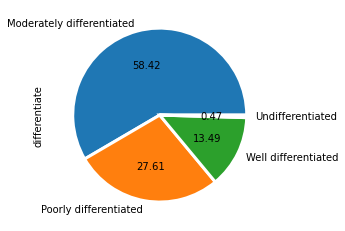

In [79]:
df["differentiate"].value_counts().plot(kind="pie",autopct='%.2f', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: differentiate, dtype: int64


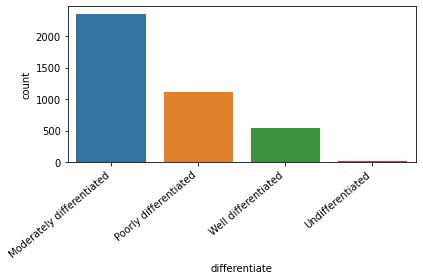

In [80]:
vc = df['differentiate'].value_counts()
print(vc)
ax = sns.countplot(x = 'differentiate', data = df, order = df['differentiate'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: Grade, dtype: int64

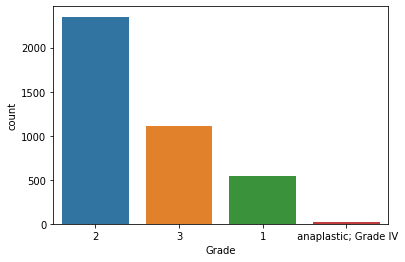

In [81]:
sns.countplot(x = 'Grade', data = df, order = df['Grade'].value_counts().index)
df['Grade'].value_counts()

<AxesSubplot:xlabel='6th Stage', ylabel='count'>

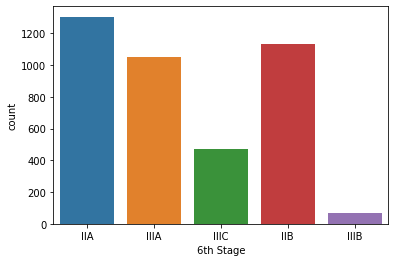

In [82]:
sns.countplot(x = '6th Stage', data = df)

In [83]:
pd.unique(df['Estrogen Status'])

array(['Positive', 'Negative'], dtype=object)

In [84]:
pd.unique(df['Progesterone Status'])

array(['Positive', 'Negative'], dtype=object)

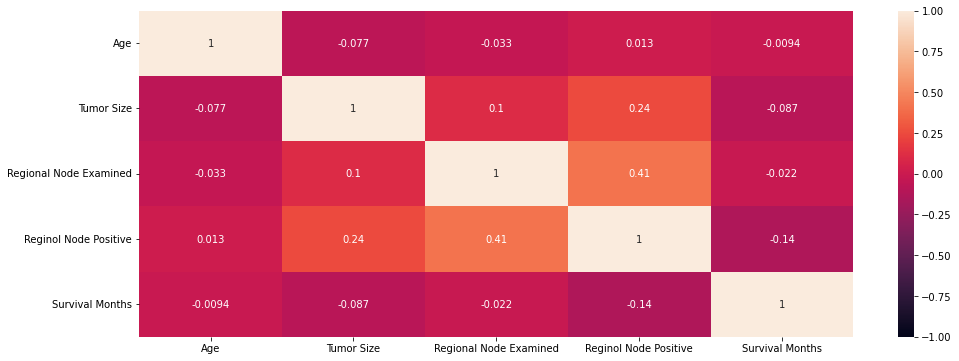

In [85]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

<AxesSubplot:xlabel='Status', ylabel='Survival Months'>

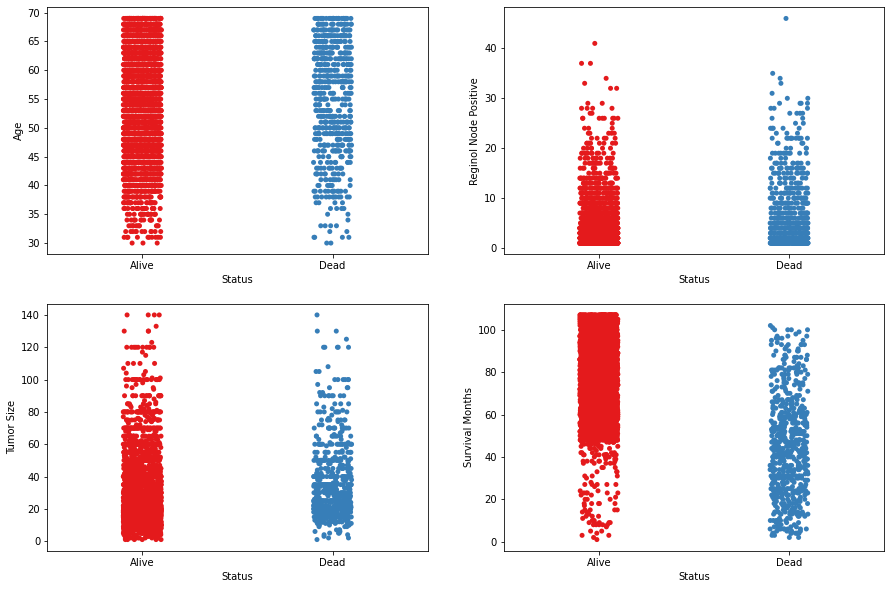

In [86]:
#Numerical Variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.stripplot(ax=axes[0, 0], data=df, x='Status', y='Age', palette = "Set1")
sns.stripplot(ax=axes[0, 1], data=df, x='Status', y='Reginol Node Positive', palette = "Set1")
sns.stripplot(ax=axes[1, 0], data=df, x='Status', y='Tumor Size', palette = "Set1")
sns.stripplot(ax=axes[1, 1], data=df, x='Status', y='Survival Months', palette = "Set1")

[Text(0.5, 1.0, '6TH STAGE')]

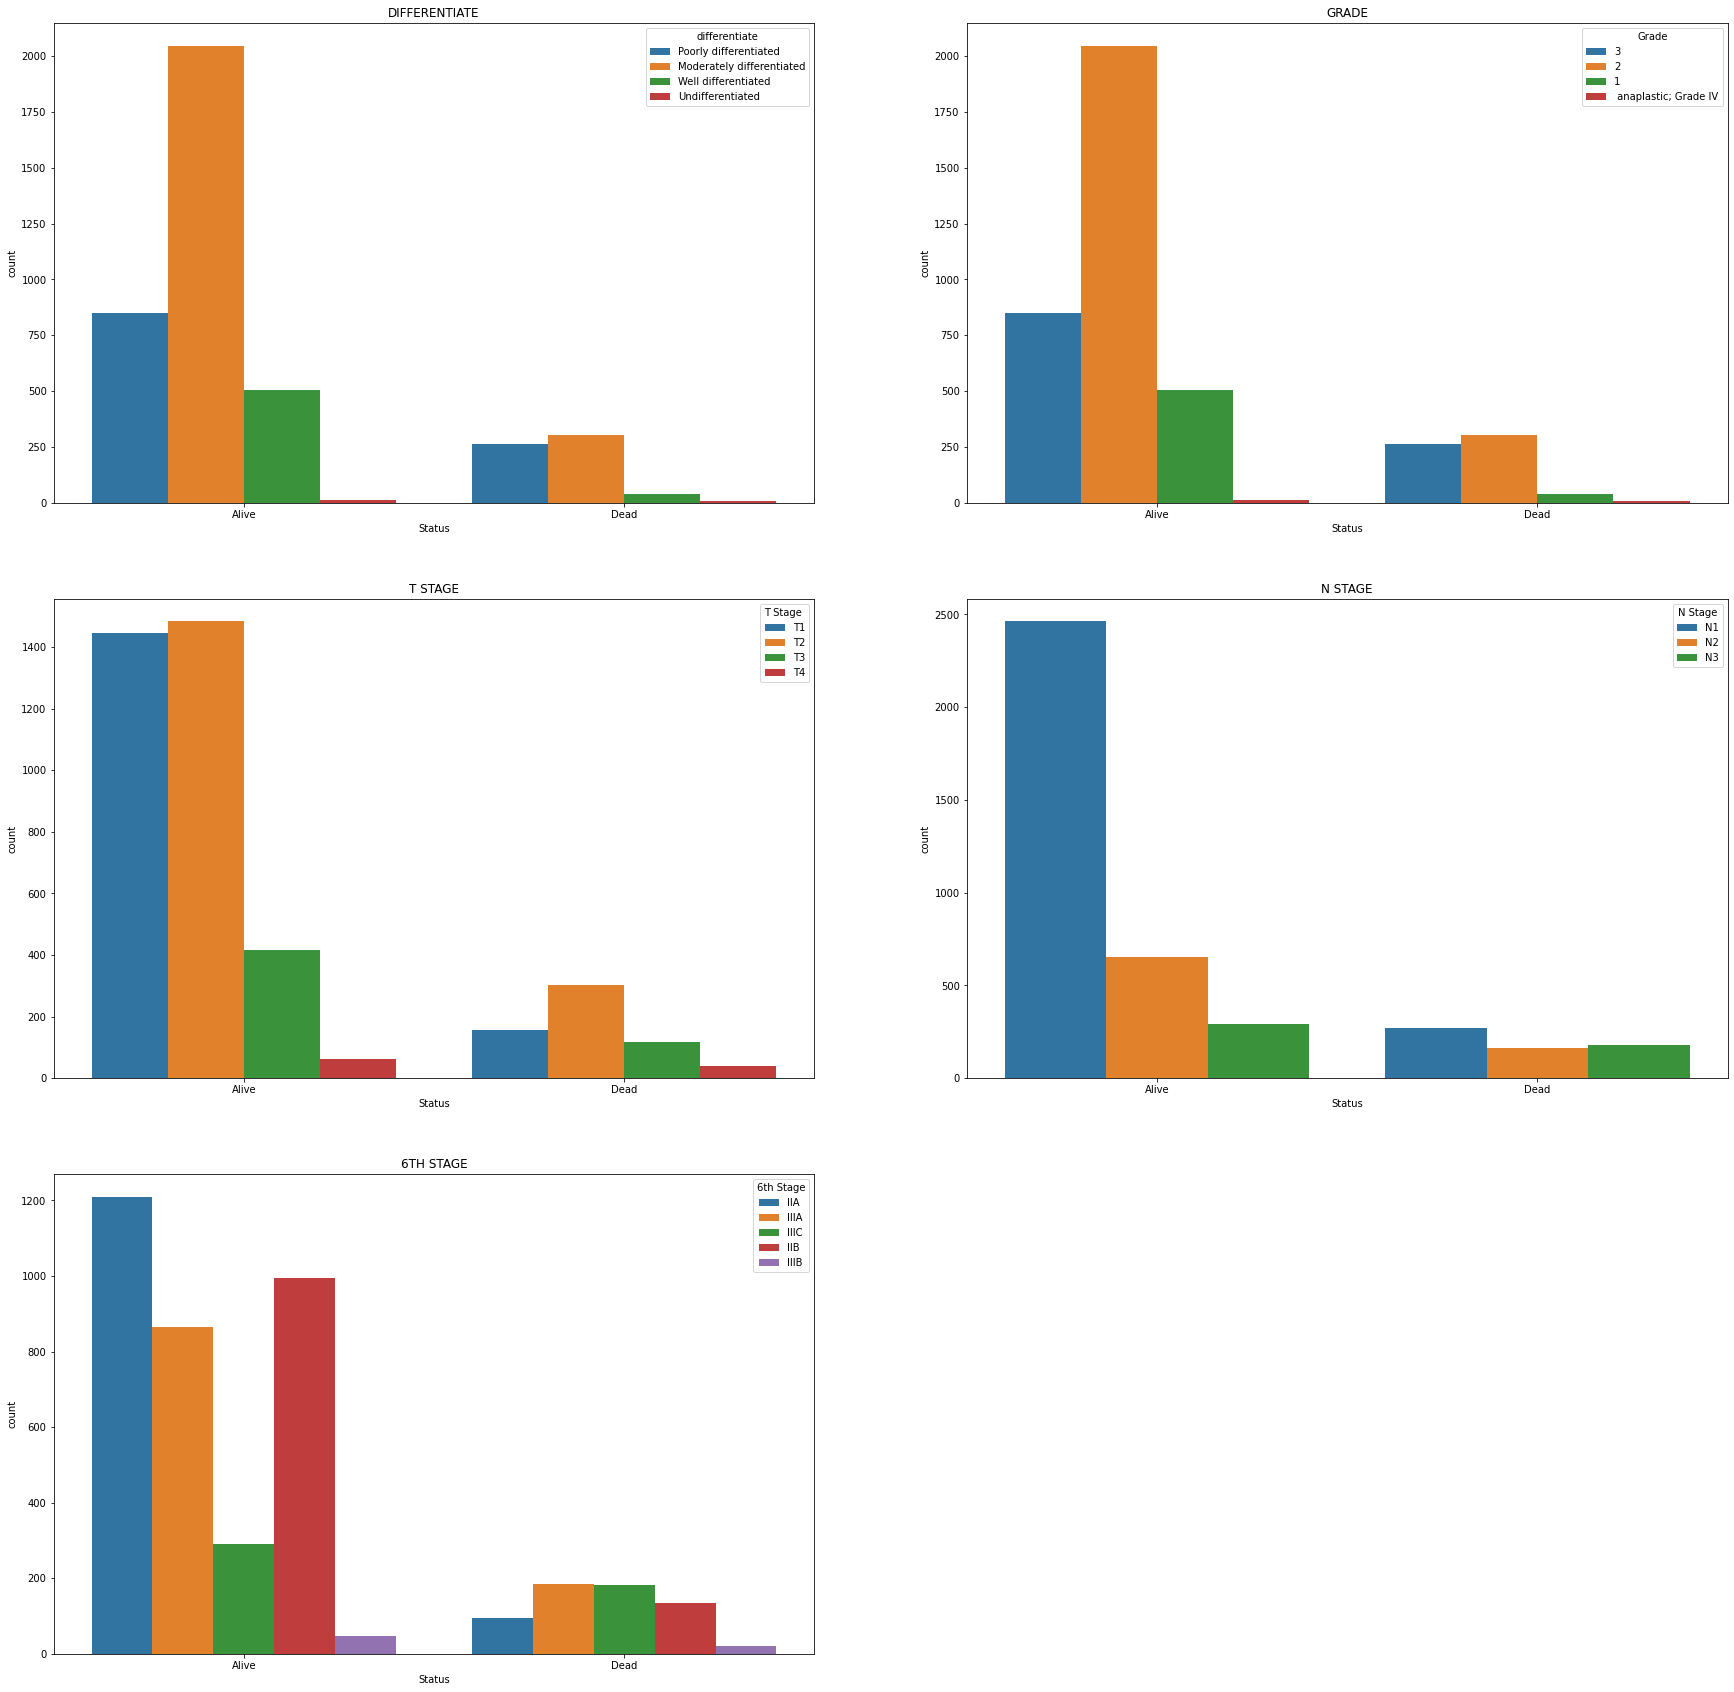

In [87]:
plt.figure(figsize = (30,30))

plt.subplot(3,2,1)
sns.countplot(x = 'Status', hue= 'differentiate', data = df).set(title='DIFFERENTIATE')

plt.subplot(3,2,2)
sns.countplot(x = 'Status', hue= 'Grade', data = df).set(title='GRADE')

plt.subplot(3,2,3)
sns.countplot(x = 'Status', hue= 'T Stage ', data = df).set(title='T STAGE')

plt.subplot(3,2,4)
sns.countplot(x = 'Status', hue= 'N Stage', data = df).set(title='N STAGE')

plt.subplot(3,2,5)
sns.countplot(x = 'Status', hue= '6th Stage', data = df).set(title='6TH STAGE')


COMPARING AGAINST GRADE

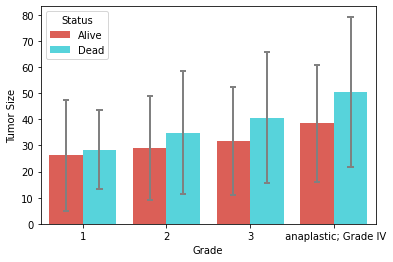

In [88]:
sns.barplot(x = 'Grade', y = 'Tumor Size', hue = 'Status', data = df,
            palette = 'hls',
            order = ["1", "2", "3", " anaplastic; Grade IV"],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            errorbar= 'sd'   
            )

#print(df.groupby(['Grade', 'Status']).['Tumor Size'])
#print(df.groupby(['Grade', 'Status']).std()['Tumor Size'])

plt.show()

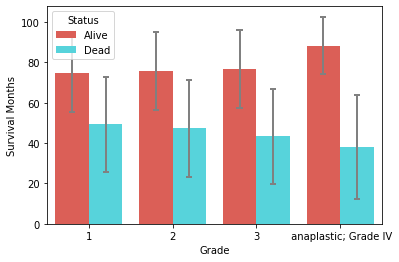

In [89]:
sns.barplot(x = 'Grade', y = 'Survival Months', hue = 'Status', data = df,
            palette = 'hls',
            order = ["1", "2", "3", " anaplastic; Grade IV"],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            errorbar= 'sd'   
            )

plt.show()

N stage

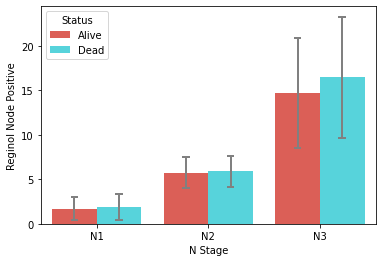

In [90]:
sns.barplot(x = 'N Stage', y = 'Reginol Node Positive', hue = 'Status', data = df,
            palette = 'hls',
            order = ["N1", "N2", "N3"],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            errorbar= 'sd'   
            )

plt.show()

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
for column in df.columns:
    if df[column].dtype == np.number:
       continue
    df[column] = LabelEncoder().fit_transform(df[column]).__array__()

In [93]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,38,2,1,0,0,0,1,3,1,3,1,1,23,0,59,0
1,20,2,1,1,1,2,0,2,1,34,1,1,13,4,61,0
2,28,2,0,2,2,4,0,2,1,62,1,1,13,6,74,0
3,28,2,1,0,0,0,1,3,1,17,1,1,1,0,83,0
4,17,2,1,1,0,1,1,3,1,40,1,1,2,0,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,32,1,1,0,0,0,0,2,1,8,1,1,0,0,48,0
4020,26,2,0,1,1,2,0,2,1,45,1,1,13,7,68,0
4021,38,2,1,1,0,1,0,2,1,21,1,0,10,2,68,0
4022,28,0,0,1,0,1,0,2,1,43,1,1,10,0,71,0


In [94]:
import seaborn as sn

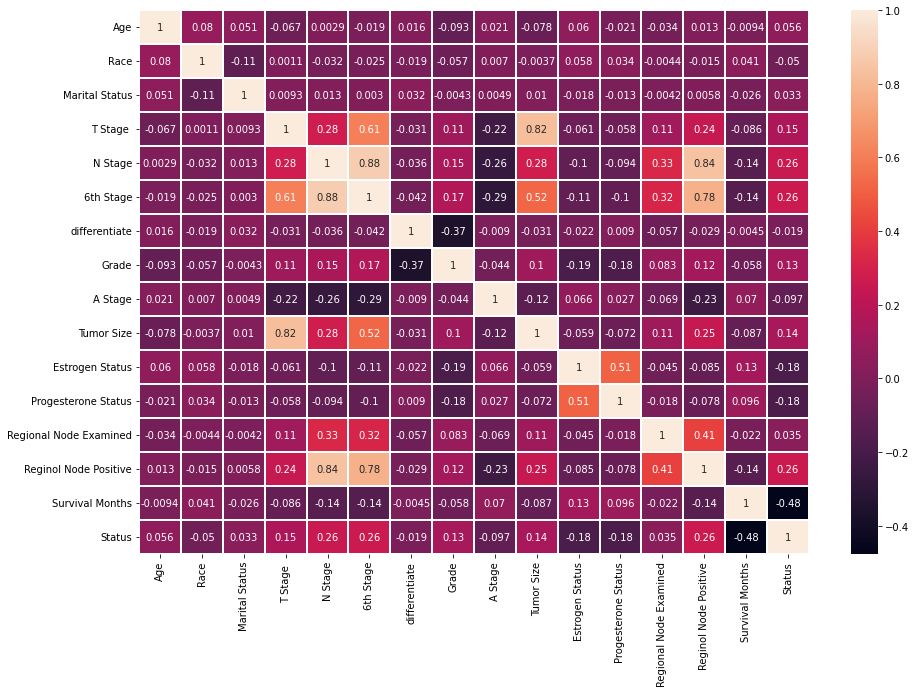

In [95]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot=True, cmap = 'rocket', linewidth = 0.01)
plt.show()

MACHINE LEARNING

MODEL BUILDING

In [96]:
X = df.drop(['Status'],axis=1)
y = df['Status']

SMOTE

In [97]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [98]:
smote = SMOTE(random_state=25)
smote_X_train, smote_Y_train = smote.fit_resample(X,y)

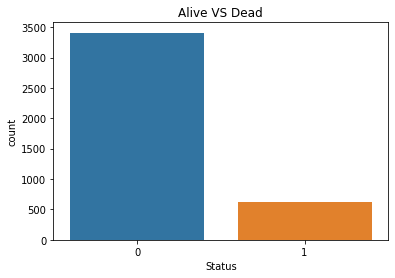

In [99]:
sns.countplot(x=y, data=df)
plt.title('Alive VS Dead')
plt.show()

In [100]:
print("Before sampling class distribution:", Counter(y))
print("After sampling class distribution:", Counter(smote_Y_train))

Before sampling class distribution: Counter({0: 3408, 1: 616})
After sampling class distribution: Counter({0: 3408, 1: 3408})


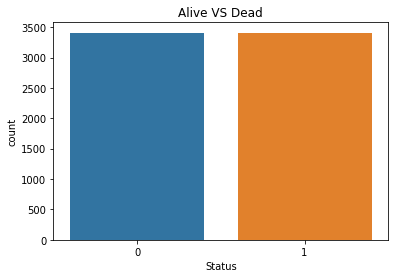

In [101]:
sns.countplot(x=smote_Y_train, data=df)
plt.title('Alive VS Dead')
plt.show()

## Train Test Split

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(smote_X_train, smote_Y_train, test_size=0.30, random_state=0)

In [104]:
X_train.shape, y_train.shape

((4771, 15), (4771,))

In [105]:
X_test.shape, y_test.shape

((2045, 15), (2045,))

In [106]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## LOGISTIC REGRESSION

In [107]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

Accuracy is: 79.804%




<AxesSubplot:>

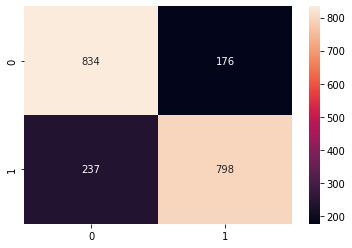

In [108]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

print('Accuracy is: {:.3f}%'.format(accuracy_score(y_test, y_pred)*100))
print("\n")

#plot confusion metrix
#plt.figure(figsize=(7, 5))
#plt.title('Confusion Matrix', size=21)
#sns.set(font_scale=1.5)
#sns.heatmap(cm, annot=True, fmt="g")


cm = confusion_matrix(y_test, y_pred)  
#print(cm)
sns.heatmap(cm, annot=True, fmt="g")

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1010
           1       0.82      0.77      0.79      1035

    accuracy                           0.80      2045
   macro avg       0.80      0.80      0.80      2045
weighted avg       0.80      0.80      0.80      2045



In [110]:
from sklearn.metrics import roc_auc_score

area_under_curve = roc_auc_score(y_test, logistic_regression.predict(X_test))

print(area_under_curve)

0.7983785335055246


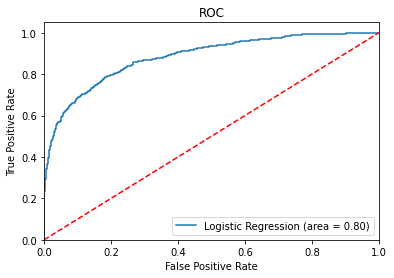

In [111]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1]) 

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [112]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [113]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [114]:
logistic_regression = LogisticRegression()
clf = GridSearchCV(logistic_regression,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

In [115]:
clf.fit(X_train,y_train)
print("Tuned Hyperparameters :", clf.best_params_)
print('Accuracy is: {:.3f}%'.format(clf.best_score_*100))

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy is: 80.507%


In [116]:
grid_predictions = clf.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1010
           1       0.82      0.77      0.79      1035

    accuracy                           0.80      2045
   macro avg       0.80      0.80      0.80      2045
weighted avg       0.80      0.80      0.80      2045



<AxesSubplot:>

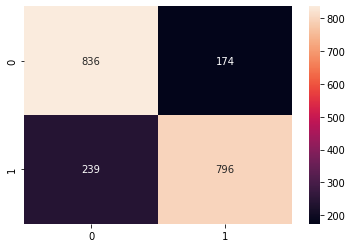

In [117]:
cm = confusion_matrix(y_test, grid_predictions)  
#print(cm)
sns.heatmap(cm, annot=True, fmt="g")

In [118]:
#Grid Search
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

print(classification_report(y_test, y_pred_acc))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1010
           1       0.82      0.77      0.80      1035

    accuracy                           0.80      2045
   macro avg       0.80      0.80      0.80      2045
weighted avg       0.80      0.80      0.80      2045



array([[834, 176],
       [236, 799]])

## NAIVE BAYES

In [119]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, accuracy_score,precision_score,recall_score,confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict(X_test)

Accuracy is: 72.763%


Precision: 80.03%
Recall: 61.55%
F1 Score: 69.58%


<AxesSubplot:>

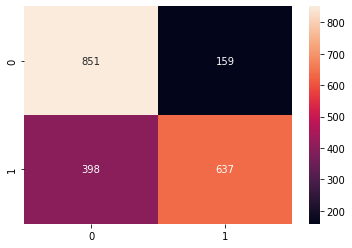

In [120]:
print('Accuracy is: {:.3f}%'.format(accuracy_score(y_test, y_pred)*100))
print("\n")
print('Precision: {:.2f}%'.format(precision_score(y_test, y_pred)*100))
print('Recall: {:.2f}%'.format(recall_score(y_test, y_pred)*100))
print('F1 Score: {:.2f}%'.format(f1_score(y_test, y_pred)*100))

cm = confusion_matrix(y_test, y_pred)  
sns.heatmap(cm, annot=True, fmt="g")

In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75      1010
           1       0.80      0.62      0.70      1035

    accuracy                           0.73      2045
   macro avg       0.74      0.73      0.72      2045
weighted avg       0.74      0.73      0.72      2045



In [122]:
from sklearn.metrics import roc_auc_score

area_under_curve = roc_auc_score(y_test, naive_bayes.predict(X_test))

print(area_under_curve)

0.729016597311905


In [123]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [124]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1, scoring='accuracy')
nbModel_grid.fit(X_train, y_train)
print("Tuned Hyperparameters :", nbModel_grid.best_params_)
print('Accuracy is: {:.3f}%'.format(nbModel_grid.best_score_*100))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Tuned Hyperparameters : {'var_smoothing': 0.006579332246575682}
Accuracy is: 73.821%


In [125]:
grid_predictions = nbModel_grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75      1010
           1       0.80      0.61      0.69      1035

    accuracy                           0.73      2045
   macro avg       0.74      0.73      0.72      2045
weighted avg       0.74      0.73      0.72      2045



<AxesSubplot:>

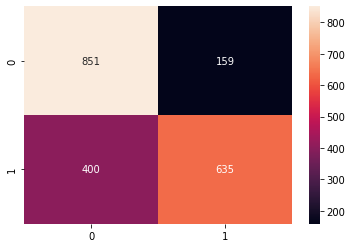

In [126]:
cm = confusion_matrix(y_test, grid_predictions)  
sns.heatmap(cm, annot=True, fmt="g")

KNN

In [127]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, p = 2) 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Accuracy is: 82.89%




<AxesSubplot:>

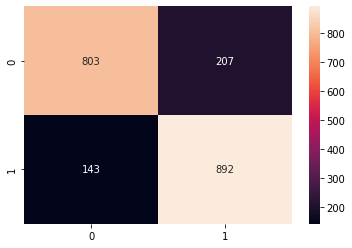

In [128]:
print('Accuracy is: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print("\n")

cm = confusion_matrix(y_test, y_pred)  
sns.heatmap(cm, annot=True, fmt="g")

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1010
           1       0.81      0.86      0.84      1035

    accuracy                           0.83      2045
   macro avg       0.83      0.83      0.83      2045
weighted avg       0.83      0.83      0.83      2045



In [130]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [131]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'n_neighbors': 1}
Accuracy for our training dataset with tuning is : 86.59%


In [132]:
grid_pre = knn.predict(X_test)

<AxesSubplot:>

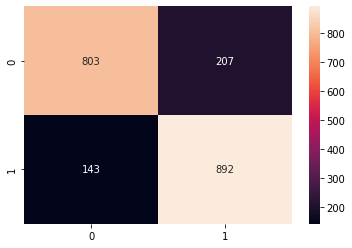

In [133]:
cm = confusion_matrix(y_test, grid_pre)  
sns.heatmap(cm, annot=True, fmt="g")

In [134]:
print(classification_report(y_test, grid_pre))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1010
           1       0.81      0.86      0.84      1035

    accuracy                           0.83      2045
   macro avg       0.83      0.83      0.83      2045
weighted avg       0.83      0.83      0.83      2045



In [135]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)

accuracies.mean()

0.8339925265124603

In [136]:

# evaluate knn performance on train and test sets with different numbers of neighbors
#from sklearn.datasets import make_classification
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
#from sklearn.neighbors import KNeighborsClassifier
#from matplotlib import pyplot
# create dataset
#X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=0)
# split into train test sets
#X_train, X_test, y_train, y_test = train_test_split(smote_X_train, smote_Y_train, test_size=0.3)
# define lists to collect scores
#train_scores, test_scores = list(), list()
# define the tree depths to evaluate
#values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
#for i in values:
 # configure the model
 #model = KNeighborsClassifier(n_neighbors=i)
 # fit model on the training dataset
 #model.fit(X_train, y_train)
 # evaluate on the train dataset
 #train_yhat = model.predict(X_train)
 #train_acc = accuracy_score(y_train, train_yhat)
 #train_scores.append(train_acc)
 # evaluate on the test dataset
 #test_yhat = model.predict(X_test)
 #test_acc = accuracy_score(y_test, test_yhat)
 #test_scores.append(test_acc)
 # summarize progress
 #print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
#pyplot.plot(values, train_scores, '-o', label='Train')
#pyplot.plot(values, test_scores, '-o', label='Test')
#pyplot.legend()
#pyplot.show()

## SVC

In [137]:
from sklearn.svm import SVC

In [138]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

Accuracy is: 83.276%


[[883 127]
 [215 820]]


<AxesSubplot:>

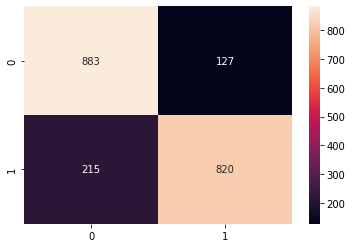

In [139]:
print('Accuracy is: {:.3f}%'.format(accuracy_score(y_test, y_pred)*100))
print("\n")

cm = confusion_matrix(y_test, y_pred)  
print(cm)
sns.heatmap(cm,annot=True,fmt="d")

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84      1010
           1       0.87      0.79      0.83      1035

    accuracy                           0.83      2045
   macro avg       0.84      0.83      0.83      2045
weighted avg       0.84      0.83      0.83      2045



In [141]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
svc_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)
  
# fitting the model for grid search
svc_grid.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [142]:
# print best parameter after tuning
print("Tuned Hyperparameters :", svc_grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(svc_grid.best_estimator_)

print('Accuracy is: {:.3f}%'.format(svc_grid.best_score_*100))

Tuned Hyperparameters : {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)
Accuracy is: 85.914%


In [143]:
grid_predictions = svc_grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1010
           1       0.85      0.86      0.86      1035

    accuracy                           0.86      2045
   macro avg       0.86      0.86      0.86      2045
weighted avg       0.86      0.86      0.86      2045



## FEATURE IMPORTANCE

In [144]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [145]:
model = LogisticRegression()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

Text(0.5, 0, 'Coefficent')

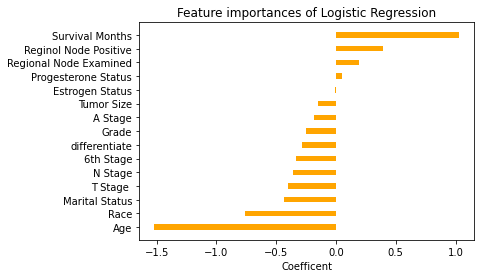

In [146]:
plt.barh(X_train.columns, sum(np.sort(model.coef_)), 0.4, color='orange')
plt.title('Feature importances of Logistic Regression')
plt.xlabel('Coefficent')


Text(0.5, 0, 'Coefficent')

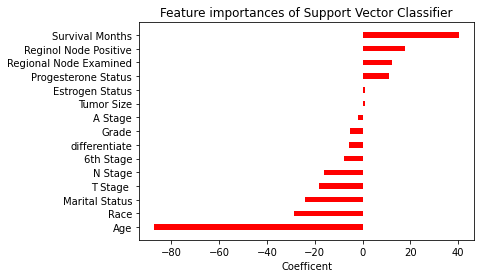

In [147]:
plt.barh(X_train.columns, sum(np.sort(svc._get_coef())), 0.4, color = 'red')
plt.title('Feature importances of Support Vector Classifier')
plt.xlabel('Coefficent')

In [148]:
#Creating SVM Model
#from sklearn import svm
#model = svm.SVC(kernel='linear')
#Importing Yellowbrick Feature Imporance and using it
#from yellowbrick.model_selection import FeatureImportances
#viz = FeatureImportances(model)
#viz.fit(X_train, Y_train)
#viz.show()